In [2]:
import geopandas as gpd
import numpy as np
from shapely.geometry import box
from shapely.ops import unary_union
import matplotlib.pyplot as plt
import contextily as ctx

In [4]:
import os

file_path = "../data/MGN2021_MPIO_POLITICO/MGN_MPIO_POLITICO.shp"
print(os.path.exists(file_path))
data_folder = "../data/"
print(os.path.exists(data_folder))

True
True


In [5]:

colombia = gpd.read_file(file_path)


In [6]:
print(colombia.columns)

Index(['DPTO_CCDGO', 'MPIO_CCDGO', 'MPIO_CDPMP', 'DPTO_CNMBR', 'MPIO_CNMBR',
       'MPIO_CRSLC', 'MPIO_NAREA', 'MPIO_CSMBL', 'MPIO_VGNC', 'MPIO_TIPO',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


In [7]:
print(colombia.head())

  DPTO_CCDGO MPIO_CCDGO MPIO_CDPMP DPTO_CNMBR  MPIO_CNMBR  \
0         05        001      05001  ANTIOQUIA    MEDELLÍN   
1         05        002      05002  ANTIOQUIA   ABEJORRAL   
2         05        004      05004  ANTIOQUIA    ABRIAQUÍ   
3         05        021      05021  ANTIOQUIA  ALEJANDRÍA   
4         05        030      05030  ANTIOQUIA       AMAGÁ   

                          MPIO_CRSLC  MPIO_NAREA MPIO_CSMBL  MPIO_VGNC  \
0                               1965  374.812877          4       2021   
1                               1814  507.141095          4       2021   
2                               1912  296.894050          4       2021   
3  Decreto departamental 304 de 1907  128.932153          4       2021   
4                               1912   84.132675          4       2021   

   MPIO_TIPO  Shape_Leng  Shape_Area  \
0  MUNICIPIO    1.032546    0.030606   
1  MUNICIPIO    1.158504    0.041384   
2  MUNICIPIO    0.812183    0.024248   
3  MUNICIPIO    0.705200    

In [8]:
colombia_bounds = colombia.total_bounds
colombia_polygon = box(*colombia_bounds)

In [10]:
# Definir tamaño de cuadrante en grados (1 km x 1 km aproximadamente)
grid_size = 0.01

# Calcular número de filas y columnas de cuadrantes
cols = int(np.ceil((colombia_bounds[2] - colombia_bounds[0]) / grid_size))
rows = int(np.ceil((colombia_bounds[3] - colombia_bounds[1]) / grid_size))

# Crear cuadrícula de cuadrantes
quadrants = []
for i in range(rows):
    for j in range(cols):
        quadrant = box(colombia_bounds[0] + j * grid_size, 
                       colombia_bounds[1] + i * grid_size,
                       colombia_bounds[0] + (j + 1) * grid_size,
                       colombia_bounds[1] + (i + 1) * grid_size)
        if colombia_polygon.intersects(quadrant):
            quadrants.append(quadrant.intersection(colombia_polygon))

# Unificar cuadrantes en un solo objeto MultiPolygon
quadrant_grid = unary_union(quadrants)


In [11]:
quadrant_ids = list(range(len(quadrants)))
quadrant_gdf = gpd.GeoDataFrame({'id': quadrant_ids, 'geometry': quadrants})

In [12]:
quadrant_gdf.to_file("cuadrantes_colombia.geojson", driver='GeoJSON')

In [18]:
quadrant_gdf.crs = "EPSG:4326"

In [19]:
quadrant_gdf_mercator = quadrant_gdf.to_crs(epsg=3857)

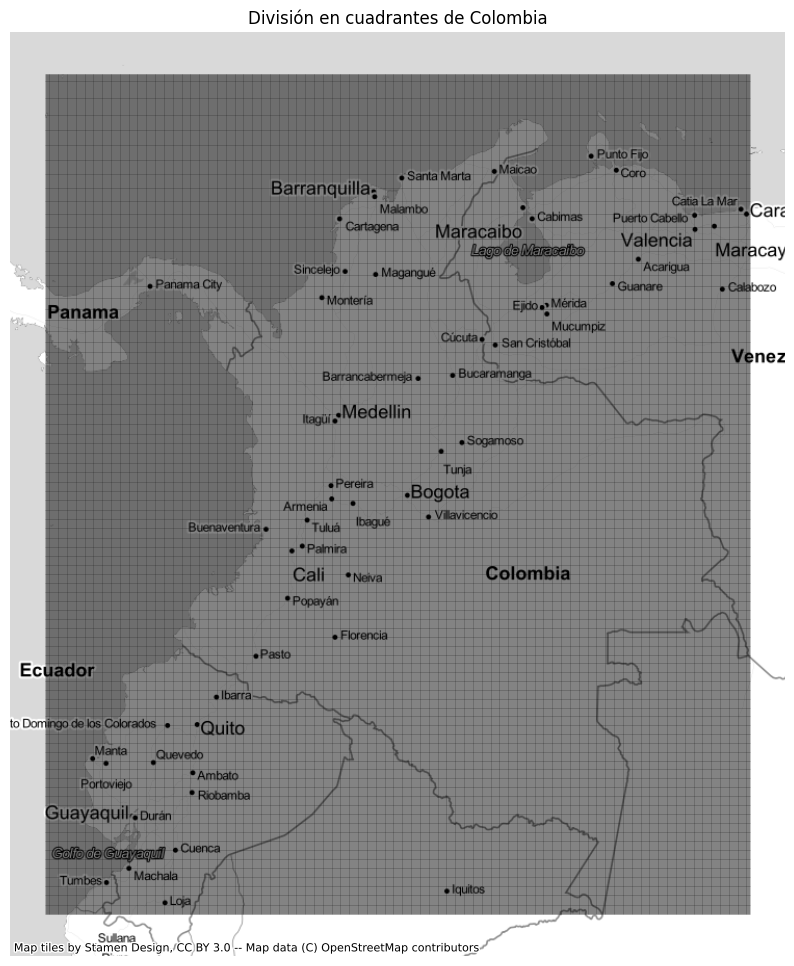

In [21]:
fig, ax = plt.subplots(figsize=(12, 12))
quadrant_gdf_mercator.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.1)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()
plt.title("División en cuadrantes de Colombia")
plt.show()

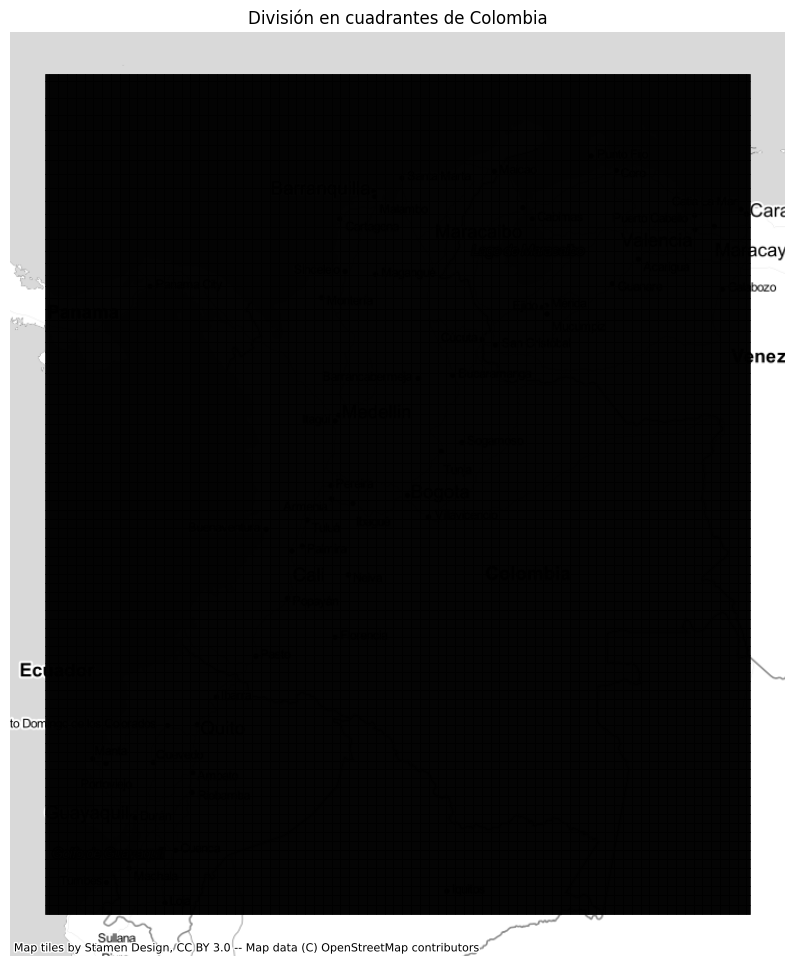

In [20]:
fig, ax = plt.subplots(figsize=(12, 12))
quadrant_gdf_mercator.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black', alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()
plt.title("División en cuadrantes de Colombia")
plt.show()